In [1]:
%matplotlib inline

In [2]:
from collections import Counter
import traceback

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from konlpy.tag import Kkma, Mecab, Okt

In [47]:
tagger = Okt() # Kkma()

In [5]:
%%time
data = pd.read_csv("../data/news_reactions_recent.csv")
# data = pd.read_csv("../data/news_reactions_tokenized.csv")
# data = pd.read_json("../data/news_reactions_tokenized.json")

CPU times: user 99.3 ms, sys: 21.9 ms, total: 121 ms
Wall time: 135 ms


In [16]:
data['date'] = data['published_at'].map(lambda x: x[:10])
data.content = data.content.map(lambda x: x.strip() if x else "")

In [17]:
data.head()

,aid,sid,oid,title,content,scraped_at,published_at,comment_count,good,warm,sad,angry,want,date,total
0,318,102,607,[전두환 프로젝트] ④ 연희동 집 가구세트도 막대한 세금으로 구입 : 네이버 뉴스,----------\n1988년 2월 대통령 자리에서 물러난 전두환이 별도의 ‘전직...,2019-09-09 11:22:07,2019.09.09. 오전 11:17,NaN,0,0,0,6,2,2019.09.09,8
1,320,102,607,"식약처, 존슨앤드존슨 제품은 빼고 '암 위험 인공유방 퇴출' : 네이버 뉴스",식품의약품안전처가 암 발병 사례가 보고된 인공유방 보형물이 리콜되고 한 달이 지나서...,2019-09-10 14:20:49,2019.09.10. 오후 2:10,NaN,0,0,0,14,0,2019.09.10,14
2,5854,103,584,달걀·견과류 아침 '공복'에 먹어야 효과 : 네이버 뉴스,"항산화제로 알려진 비타민E의 흡수율을 높이려면 아침식사 때 달걀, 견과류 등 지질이...",2019-09-09 15:20:40,2019.09.09. 오후 2:53,NaN,22,1,0,4,2,2019.09.09,29
3,5860,103,584,'건강 망치는 뱃살' 여성이 더 위험해요 : 네이버 뉴스,배꼽을 깊숙하게 만들 만큼 퉁퉁한 뱃살은 대부분 내장지방으로 당뇨병과 심혈관질환을...,2019-09-10 06:40:25,2019.09.10. 오전 4:00,NaN,5,0,2,0,1,2019.09.10,8
4,5868,105,584,한국 첫 달 탐사계획 다시 또 연기…2022년 7월 궤도선 발사(종합) : 네이버 뉴스,한국 최초 달탐사선(궤도선) 발사 계획이 당초보다 19개월 순연돼 2022년 7월로...,2019-09-10 12:40:48,2019.09.10. 오전 11:56,NaN,4,1,2,78,1,2019.09.10,86


In [15]:
data.describe()

,aid,sid,oid,comment_count,good,warm,sad,angry,want,total
count,2.302000e+03,2302.000000,2302.000000,0.0,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000
mean,3.989582e+06,101.943527,100.466985,NaN,162.328844,2.101651,7.661164,405.619896,4.766290,582.477845
std,3.380042e+06,3.367448,148.037968,NaN,952.484992,6.020760,58.418152,2044.588039,15.370497,2411.667917
min,3.180000e+02,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.381000e+06,101.000000,14.000000,NaN,2.000000,0.000000,0.000000,1.000000,0.000000,7.000000
50%,3.240051e+06,102.000000,25.000000,NaN,7.000000,0.000000,0.000000,11.000000,1.000000,38.000000
75%,4.465219e+06,103.000000,81.000000,NaN,40.000000,2.000000,2.000000,103.750000,3.000000,251.000000
max,1.107595e+07,105.000000,607.000000,NaN,27517.000000,85.000000,1894.000000,50444.000000,253.000000,52982.000000


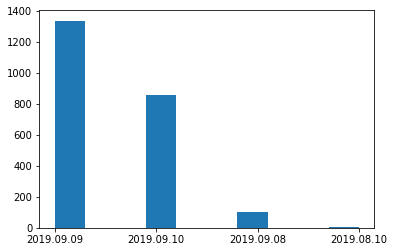

In [20]:
plt.hist(data.date)
plt.show()

## 텍스트 분석
제목 평균길이<br>
내용 평균길이<br>
토큰 길이 분석

In [53]:
%%time 

allowed_pos = [
    'Noun', 'Verb', 'Adjective', 'Adverb', 'Alpha', 'Determiner', 'Exclamation'
    , 'Suffix', 'PreEomi', 'Unknown'
]
def try_tagging(x):
    x = x.strip() if x else ""
    tokens = tagger.pos(x)
    tokens = filter(lambda x: x[1] in allowed_pos, tokens)
    tokens = map(lambda x: x[0], tokens)
    return list(tokens)

# print(tagger.tagset)
# print(" ".join(try_tagging(data.content[1])))
data['title_len'] = data['title'].map(lambda x: len(x))
data['content_len'] = data['content'].map(lambda x: len(x))
data['title_token'] = data.title.map(try_tagging)
data['title_token_len'] = data.title_token.map(lambda x: len(x))
data['content_token'] = data.content.map(try_tagging)
data['content_token_len'] = data.content_token.map(lambda x: len(x))

CPU times: user 1min 57s, sys: 964 ms, total: 1min 58s
Wall time: 2min


In [54]:
print(data['title_token'].head())
print(data['content_token'].head())

0     [전두환, 프로젝트, 연희동, 집, 가구, 세트, 막대, 세금, 구입, 네이버, 뉴스]
1    [식약처, 존슨, 앤드, 존슨, 제품, 빼고, 암, 위험, 인공, 유방, 퇴, 출,...
2                  [달걀, 견과류, 아침, 공복, 먹어야, 효과, 네이버, 뉴스]
3                  [건강, 망치는, 뱃살, 여성, 더, 위험해요, 네이버, 뉴스]
4    [한국, 첫, 달, 탐사, 계획, 다시, 또, 연기, 궤도선, 발사, 종합, 네이버...
Name: title_token, dtype: object
0    [대통령, 자리, 물러난, 전두환, 별도, 전직, 대통령, 사무실, 내지, 않았으면...
1    [식품의약품안전처, 암, 발병, 사례, 보고, 된, 인공, 유방, 보, 형, 물이,...
2    [항산화제, 알려진, 비타민, E, 의, 흡수, 율, 높이려면, 아침식사, 때, 달...
3    [배꼽, 깊숙하게, 만들, 만큼, 퉁퉁, 뱃살, 대부분, 내장, 지방, 당뇨병, 심...
4    [한국, 최초, 달, 탐사선, 궤도선, 발사, 계획, 당초, 개월, 순연, 돼, 연...
Name: content_token, dtype: object


Title length
count    2302.000000
mean       41.474370
std         6.319674
min        17.000000
25%        38.000000
50%        41.000000
75%        45.000000
max        90.000000
Name: title_len, dtype: float64


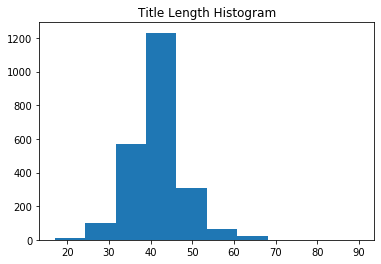

Title token length
count    2302.000000
mean       11.397480
std         2.075425
min         5.000000
25%        10.000000
50%        11.000000
75%        13.000000
max        27.000000
Name: title_token_len, dtype: float64


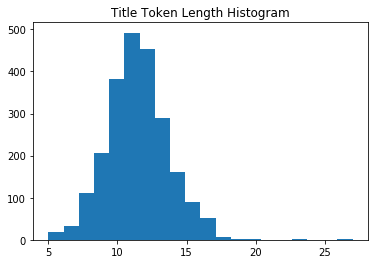

In [55]:
print("Title length")
print(data.title_len.describe())
plt.title("Title Length Histogram")
plt.hist(data['title_len'], bins=10)
plt.show()

print("Title token length")
print(data.title_token_len.describe())
plt.title("Title Token Length Histogram")
plt.hist(data['title_token_len'], bins=20)
plt.show()

Content length
count     2302.000000
mean      1466.651607
std        849.396898
min          0.000000
25%        949.000000
50%       1325.000000
75%       1787.500000
max      10639.000000
Name: content_len, dtype: float64


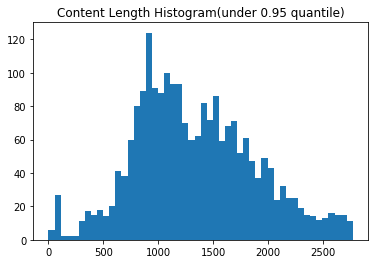

Content token length
count    2302.000000
mean      393.657255
std       232.359242
min         0.000000
25%       251.000000
50%       351.500000
75%       480.000000
max      2766.000000
Name: content_token_len, dtype: float64


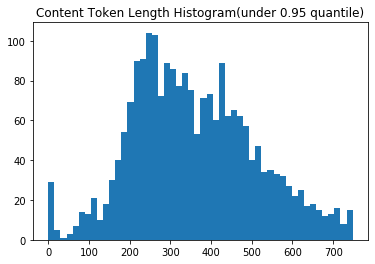

In [56]:
print("Content length")
print(data.content_len.describe())
plt.title("Content Length Histogram(under 0.95 quantile)")
plt.hist(data[data.content_len < data.content_len.quantile(0.95)]['content_len'], bins=50)
plt.show()

print("Content token length")
print(data.content_token_len.describe())
plt.title("Content Token Length Histogram(under 0.95 quantile)")
plt.hist(data[data.content_token_len < data.content_token_len.quantile(0.95)] ['content_token_len'], bins=50)
plt.show()

## 감정 분석
4분위 분석
감정표현 총 합의 평균

In [57]:
reactions = data[['good', 'warm', 'sad', 'angry', 'want']]
total = reactions.sum(axis=1)
pos = data[['good', 'warm']].sum(axis=1)
neg = data.angry

Total Reactions
count     2302.000000
mean       582.477845
std       2411.667917
min          0.000000
25%          7.000000
50%         38.000000
75%        251.000000
max      52982.000000
dtype: float64


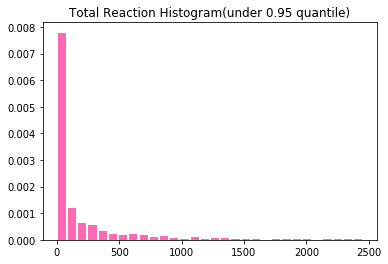

Positive Reactions(Good,Warm)
count     2302.000000
mean       164.430495
std        955.986231
min          0.000000
25%          2.000000
50%          7.000000
75%         42.000000
max      27588.000000
dtype: float64


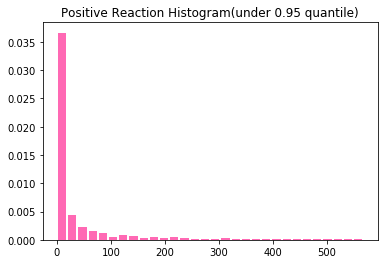

Negative Reactions(Sad, Angry)
count     2302.000000
mean       405.619896
std       2044.588039
min          0.000000
25%          1.000000
50%         11.000000
75%        103.750000
max      50444.000000
Name: angry, dtype: float64


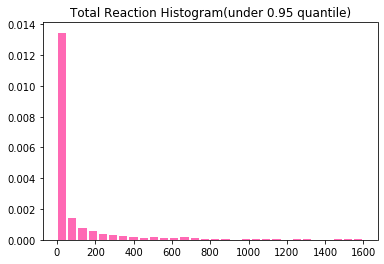

In [58]:
print("Total Reactions")
print(total.describe())
plt.title("Total Reaction Histogram(under 0.95 quantile)")
plt.hist(total[total < total.quantile(0.95)] , 
         bins=30, ## 몇 개의 바구니로 구분할 것인가. 
         density=True, ## ytick을 퍼센트비율로 표현해줌 
         cumulative=False, ## 누적으로 표현하고 싶을 때는 True
         histtype='bar',  ## 타입. or step으로 하면 모양이 바뀜.  
         orientation='vertical', ## or horizontal
         rwidth=0.8, ## 1.0일 경우, 꽉 채움 작아질수록 간격이 생김
         color='hotpink', ## bar 색깔
        )
plt.show()
print("Positive Reactions(Good,Warm)")
print(pos.describe())
plt.title("Positive Reaction Histogram(under 0.95 quantile)")
plt.hist(pos[pos < pos.quantile(0.95)] , 
         bins=30, ## 몇 개의 바구니로 구분할 것인가. 
         density=True, ## ytick을 퍼센트비율로 표현해줌 
         cumulative=False, ## 누적으로 표현하고 싶을 때는 True
         histtype='bar',  ## 타입. or step으로 하면 모양이 바뀜.  
         orientation='vertical', ## or horizontal
         rwidth=0.8, ## 1.0일 경우, 꽉 채움 작아질수록 간격이 생김
         color='hotpink', ## bar 색깔
        )
plt.show()
print("Negative Reactions(Sad, Angry)")
print(neg.describe())
plt.title("Total Reaction Histogram(under 0.95 quantile)")
plt.hist(neg[neg < neg.quantile(0.95)] , 
         bins=30, ## 몇 개의 바구니로 구분할 것인가. 
         density=True, ## ytick을 퍼센트비율로 표현해줌 
         cumulative=False, ## 누적으로 표현하고 싶을 때는 True
         histtype='bar',  ## 타입. or step으로 하면 모양이 바뀜.  
         orientation='vertical', ## or horizontal
         rwidth=0.8, ## 1.0일 경우, 꽉 채움 작아질수록 간격이 생김
         color='hotpink', ## bar 색깔
        )
plt.show()

In [59]:
category_label = ['pos', 'neg', 'unk']
category = []
for i in range(len(data)):
    r = 2
    p = pos[i]
    n = neg[i]
    
    if p + n >= 5 and abs(p - n) > 5:
        r = 0 if p > n else 1
    else:
        r = 2
        
    category.append(r)

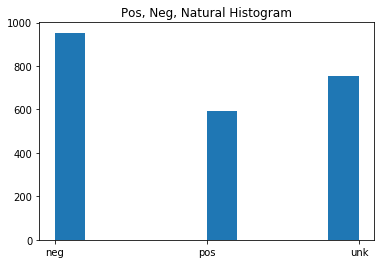

In [60]:
plt.title("Pos, Neg, Natural Histogram")
plt.hist(list(map(lambda x: category_label[x], category)))
plt.show()

In [61]:
data['reaction_category'] = category

In [62]:
# 전처리 결과 저장
preprocessed_labels = [
    'title_token',
    'content_token',
    'reaction_category'
]
data[preprocessed_labels].to_json("../data/news_reactions_recent_preprocessed.json")